<a href="https://colab.research.google.com/github/Domaakshithareddy/Fruit-Quality-Identification/blob/main/Fruit_Quality_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset loading**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akshithawork","key":"2a8a58f04b0f76977865a2f20916dd83"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d ryandpark/fruit-quality-classification

Dataset URL: https://www.kaggle.com/datasets/ryandpark/fruit-quality-classification
License(s): CC0-1.0


In [4]:
import zipfile
import os

dataset_path = "fruit-quality-classification.zip"  # Ensure this matches the downloaded filename
extract_path = "fruit_quality_data"  # Folder to extract to

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
os.listdir(extract_path)

['Mixed Qualit_Fruits', 'Bad Quality_Fruits', 'Good Quality_Fruits']

In [5]:
import os

# Define dataset paths
directories = [
    "fruit_quality_data/Bad Quality_Fruits/Apple_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Banana_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Guava_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Lime_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Orange_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Pomegranate_Bad",
    "fruit_quality_data/Good Quality_Fruits/Apple_Good",
    "fruit_quality_data/Good Quality_Fruits/Banana_Good",
    "fruit_quality_data/Good Quality_Fruits/Guava_Good",
    "fruit_quality_data/Good Quality_Fruits/Lime_Good",
    "fruit_quality_data/Good Quality_Fruits/Orange_Good",
    "fruit_quality_data/Good Quality_Fruits/Pomegranate_Good",
    "fruit_quality_data/Mixed Qualit_Fruits/Apple",
    "fruit_quality_data/Mixed Qualit_Fruits/Banana",
    "fruit_quality_data/Mixed Qualit_Fruits/Guava",
    "fruit_quality_data/Mixed Qualit_Fruits/Lemon",
    "fruit_quality_data/Mixed Qualit_Fruits/Orange",
    "fruit_quality_data/Mixed Qualit_Fruits/Pomegranate",
]

# Count and print the number of images in each directory
total=0
for directory in directories:
    if os.path.exists(directory):  # Ensure the directory exists
        num_images = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
        print(f"Number of images in '{directory}': {num_images}")
        total+=num_images
    else:
        print(f"Directory '{directory}' does not exist.")
print(total)

Number of images in 'fruit_quality_data/Bad Quality_Fruits/Apple_Bad': 1141
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Banana_Bad': 1087
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Guava_Bad': 1129
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Lime_Bad': 1085
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Orange_Bad': 1159
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Pomegranate_Bad': 1187
Number of images in 'fruit_quality_data/Good Quality_Fruits/Apple_Good': 1149
Number of images in 'fruit_quality_data/Good Quality_Fruits/Banana_Good': 1113
Number of images in 'fruit_quality_data/Good Quality_Fruits/Guava_Good': 1152
Number of images in 'fruit_quality_data/Good Quality_Fruits/Lime_Good': 1094
Number of images in 'fruit_quality_data/Good Quality_Fruits/Orange_Good': 1216
Number of images in 'fruit_quality_data/Good Quality_Fruits/Pomegranate_Good': 5940
Number of images in 'fruit_quality_data/Mixed Qualit_Fruits/Ap

# **Dataset Preparation**

split the dataset only into bad good and mixed with all fruits

In [6]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
original_dataset_dir = "fruit_quality_data"
dataset_dir = "dataset"
categories = ["Bad Quality_Fruits", "Good Quality_Fruits", "Mixed Qualit_Fruits"]

train_ratio, val_ratio = 0.7, 0.2

for category in categories:
    category_path = os.path.join(original_dataset_dir, category)
    images = []  # Store all images of this category

    # Collect images and print counts per subfolder
    for fruit_type in os.listdir(category_path):
        fruit_path = os.path.join(category_path, fruit_type)
        if os.path.isdir(fruit_path):
            fruit_images = [os.path.join(fruit_path, img) for img in os.listdir(fruit_path)]
            images.extend(fruit_images)

    # Split dataset
    train_images, temp_images = train_test_split(images, train_size=train_ratio, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    # Function to copy files safely
    def move_images(image_list, destination):
        os.makedirs(destination, exist_ok=True)
        for img_path in image_list:
            if os.path.exists(img_path):
                # Rename while copying to avoid overwriting
                new_filename = os.path.basename(os.path.dirname(img_path)) + "_" + os.path.basename(img_path)
                shutil.copy(img_path, os.path.join(destination, new_filename))

    # Move images
    move_images(train_images, os.path.join(dataset_dir, "train", category))
    move_images(val_images, os.path.join(dataset_dir, "val", category))
    move_images(test_images, os.path.join(dataset_dir, "test", category))

In [7]:
import os
directories = [
    "dataset/train/Bad Quality_Fruits",
    "dataset/train/Good Quality_Fruits",
    "dataset/train/Mixed Qualit_Fruits",
    "dataset/test/Bad Quality_Fruits",
    "dataset/test/Good Quality_Fruits",
    "dataset/test/Mixed Qualit_Fruits",
    "dataset/val/Bad Quality_Fruits",
    "dataset/val/Good Quality_Fruits",
    "dataset/val/Mixed Qualit_Fruits"
]
total=0
for directory in directories:
    if os.path.exists(directory):
        num_images = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
        print(f"Number of images in '{directory}': {num_images}")
        total+=num_images
    else:
        print(f"Directory '{directory}' does not exist.")
print(total)

Number of images in 'dataset/train/Bad Quality_Fruits': 4751
Number of images in 'dataset/train/Good Quality_Fruits': 8164
Number of images in 'dataset/train/Mixed Qualit_Fruits': 751
Number of images in 'dataset/test/Bad Quality_Fruits': 1019
Number of images in 'dataset/test/Good Quality_Fruits': 1750
Number of images in 'dataset/test/Mixed Qualit_Fruits': 162
Number of images in 'dataset/val/Bad Quality_Fruits': 1018
Number of images in 'dataset/val/Good Quality_Fruits': 1750
Number of images in 'dataset/val/Mixed Qualit_Fruits': 161
19526


# **Data Preparation**

In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [9]:
base_dir = "dataset"

train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'val')
test_dir=os.path.join(base_dir,'test')

IMG_HEIGHT=256
IMG_WIDTH=256
BATCH_SIZE=32

train_datagen=ImageDataGenerator(
    rescale=1./256,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen=ImageDataGenerator(rescale=1./256)
test_datagen=ImageDataGenerator(rescale=1./256)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

class_labels = list(train_generator.class_indices.keys())
print(f"Class Labels: {class_labels}")

Found 13666 images belonging to 3 classes.
Found 2929 images belonging to 3 classes.
Found 2931 images belonging to 3 classes.
Class Labels: ['Bad Quality_Fruits', 'Good Quality_Fruits', 'Mixed Qualit_Fruits']


# **CNN Model**

In [10]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3,activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,714,371 (14.17 MB)

 Trainable params: 3,714,371 (14.17 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Define training parameters
EPOCHS = 9

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/9
428/428 ━━━━━━━━━━━━━━━━━━━━ 337s 769ms/step - accuracy: 0.6637 - loss: 0.7440 - val_accuracy: 0.8358 - val_loss: 0.3926
Epoch 2/9
428/428 ━━━━━━━━━━━━━━━━━━━━ 313s 731ms/step - accuracy: 0.8184 - loss: 0.4980 - val_accuracy: 0.8610 - val_loss: 0.3915
Epoch 3/9
428/428 ━━━━━━━━━━━━━━━━━━━━ 305s 713ms/step - accuracy: 0.8607 - loss: 0.3848 - val_accuracy: 0.8733 - val_loss: 0.3021
Epoch 4/9
428/428 ━━━━━━━━━━━━━━━━━━━━ 305s 712ms/step - accuracy: 0.8641 - loss: 0.3670 - val_accuracy: 0.8826 - val_loss: 0.2782
Epoch 5/9
428/428 ━━━━━━━━━━━━━━━━━━━━ 298s 697ms/step - accuracy: 0.8769 - loss: 0.3364 - val_accuracy: 0.8798 - val_loss: 0.2790
Epoch 6/9
428/428 ━━━━━━━━━━━━━━━━━━━━ 301s 703ms/step - accuracy: 0.8824 - loss: 0.3134 - val_accuracy: 0.8720 - val_loss: 0.3375
Epoch 7/9
428/428 ━━━━━━━━━━━━━━━━━━━━ 321s 751ms/step - accuracy: 0.8797 - loss: 0.3174 - val_accuracy: 0.8986 - val_loss: 0.2422
Epoch 8/9
428/428 ━━━━━━━━━━━━━━━━━━━━ 315s 735ms/step - accuracy: 0.8861 - loss: 0

In [12]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 275ms/step - accuracy: 0.9131 - loss: 0.2475
Test Accuracy: 90.96%


In [14]:
model.save("fruit_quality_cnn_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = keras.models.load_model("fruit_quality_cnn_model.h5")

# Function to predict fruit quality
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Reshape for model

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    print(f"Predicted Class: {predicted_class}")

# Example: Predict on a new image
predict_image("Unknown.jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
Predicted Class: Bad Quality_Fruits


In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = keras.models.load_model("fruit_quality_cnn_model.h5")

# Function to predict fruit quality
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Reshape for model

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    print(f"Predicted Class: {predicted_class}")

# Example: Predict on a new image
predict_image("Unknown-ba.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
Predicted Class: Good Quality_Fruits


# **Graphs**

Found 2931 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 257ms/step


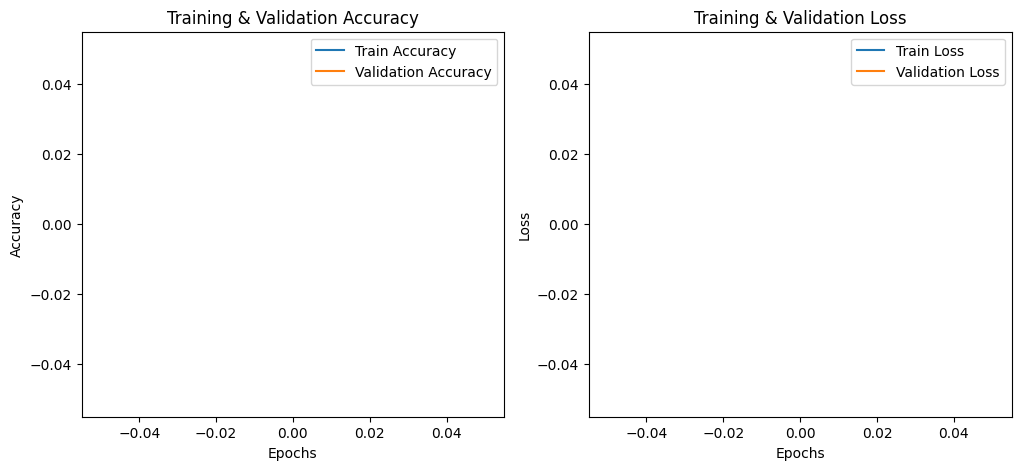

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import random

# 📌 Load the trained model
model = tf.keras.models.load_model("fruit_quality_cnn_model.h5")

# 📌 Load test data generator
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    "dataset/test",  # Change path if needed
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# 📌 Compute Predictions
y_true = test_generator.classes  # Actual labels
y_pred_probs = model.predict(test_generator)  # Probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Predicted class labels

# 📈 **1. Plot Training & Validation Accuracy & Loss**
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(model.history.history.get('categorical_accuracy', model.history.history.get('accuracy', [])), label='Train Accuracy')
plt.plot(model.history.history.get('val_categorical_accuracy', model.history.history.get('val_accuracy', [])), label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(model.history.history.get('loss', []), label='Train Loss')
plt.plot(model.history.history.get('val_loss', []), label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()

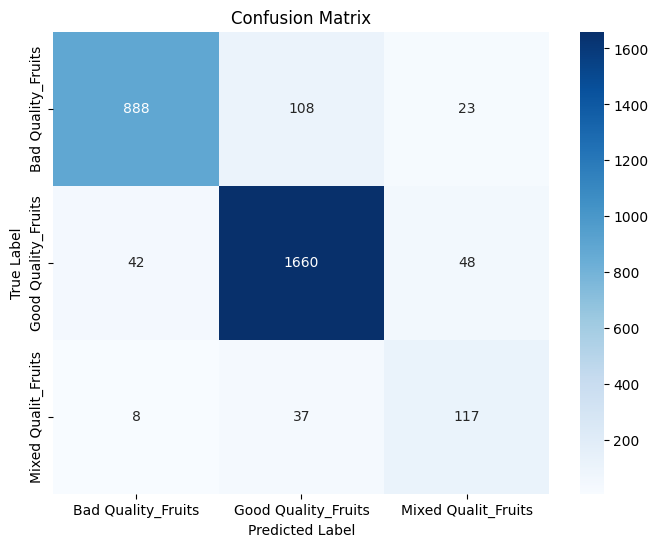

In [24]:
# 📊 **2. Confusion Matrix**
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# 📑 **3. Classification Report**
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


Classification Report:
                      precision    recall  f1-score   support

 Bad Quality_Fruits       0.95      0.87      0.91      1019
Good Quality_Fruits       0.92      0.95      0.93      1750
Mixed Qualit_Fruits       0.62      0.72      0.67       162

           accuracy                           0.91      2931
          macro avg       0.83      0.85      0.84      2931
       weighted avg       0.91      0.91      0.91      2931



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


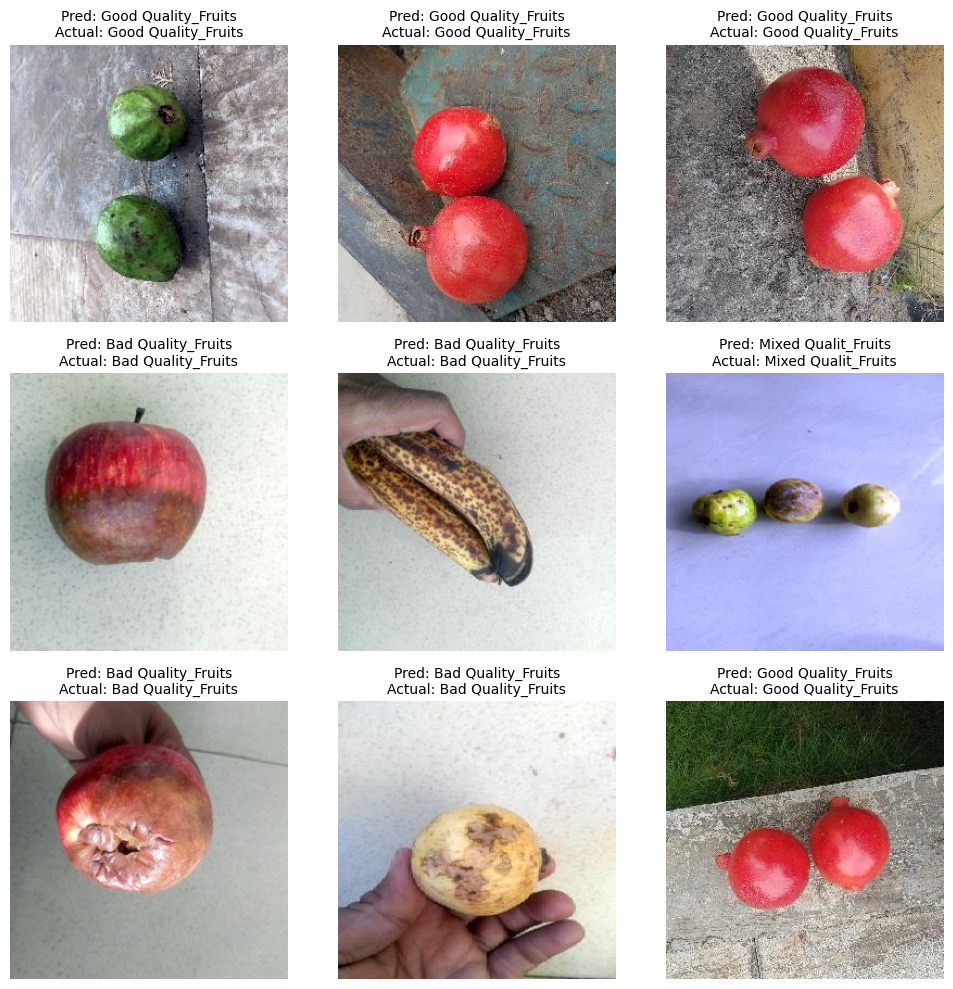

In [26]:

# 🎯 **4. Sample Predictions**
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
class_labels = list(test_generator.class_indices.keys())

for ax in axes.flat:
    img_path = random.choice(test_generator.filepaths)  # Random test image
    img = image.load_img(img_path, target_size=(256, 256))  # Load & Resize
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)
    predicted_class = class_labels[np.argmax(pred)]
    actual_class = img_path.split('/')[-2]  # Extract actual class

    # Show Image
    ax.imshow(img)
    ax.set_title(f"Pred: {predicted_class}\nActual: {actual_class}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()
